In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
filename = "./log_exp2.txt"
df = pd.read_csv(filename, skipinitialspace=True)

In [3]:
mean_walltime = df.groupby('p').mean().sort_index()
processor = mean_walltime.index.values.tolist()
mean_walltime = mean_walltime['t'].to_numpy()
max_walltime = df.groupby('p').max().sort_index()['t'].to_numpy()
min_walltime = df.groupby('p').min().sort_index()['t'].to_numpy()

In [4]:
def plot_func(ax, processor, time_min, time_mean, time_max):
    ax.fill_between(processor, time_min, time_max, alpha=0.5)
    ax.plot(processor, time_mean)

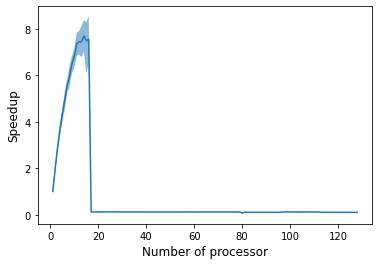

In [5]:
speedup_mean = mean_walltime[0]/mean_walltime
speedup_max = max_walltime[0]/min_walltime 
speedup_min = min_walltime[0]/max_walltime
ax = plt.subplot()
plot_func(ax, processor, speedup_min, speedup_mean, speedup_max)
ax.set_xlabel("Number of processor", fontsize=12)
ax.set_ylabel("Speedup", fontsize=12)
plt.show()

## Walltime

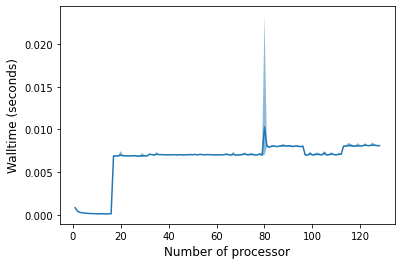

In [6]:
ax = plt.subplot()
plot_func(ax, processor, min_walltime, mean_walltime, max_walltime)
ax.set_xlabel("Number of processor", fontsize=12)
ax.set_ylabel("Walltime (seconds)", fontsize=12)
plt.show()